In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [2]:
#cheching version and gpu support
print("Tensorflow: ", tf.__version__)

print("Tensorflow Gpu: ", tf.test.is_gpu_available())

# print('Tensorboard:', tensorboard.__version__ )
# 


Tensorflow:  2.0.0
Tensorflow Gpu:  True


#### It is a starter tutorial for tensorflow 2.0. I am using Faishon MNist data to work through this blog

Let's start with loading dataset

In [3]:
mnist = keras.datasets.fashion_mnist

mnist.load_data() is used to load dataset and this  gives two set as a output

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Check shape

In [5]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

chechking max and min value

In [6]:
print("Maximum value in X_train", np.max(X_train))
print("Min value X_train", np.min(X_train))

Maximum value in X_train 255
Min value X_train 0


So, Here we have maximum value 255 and minmum value is zero

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Y_train has 10 values from 0 to 9

In [8]:
class_name = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [9]:
class_name

['top',
 'trouser',
 'pullover',
 'dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'ankle boot']

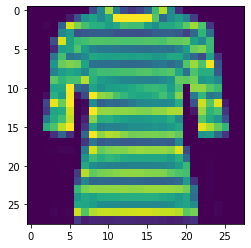

In [10]:
#print any random image to see
plt.figure()
plt.imshow(X_train[26])

plotting with colobar as we saw we have 0 to 255 value

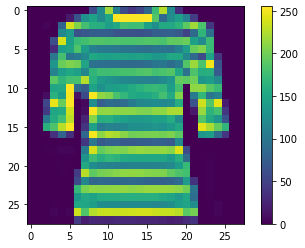

In [11]:
plt.figure()
plt.imshow(X_train[26])
plt.colorbar()

so here we have minmum 0 and maximum 250 value that is pixelet in 28*28
Tensorflow accept value between 0 to 1. So we have to convert value 0-255 to 0-1

In [12]:
X_train = X_train/255.0
X_test = X_test/255.0

Now, let's plot same image with colorbar to check it has changed or not

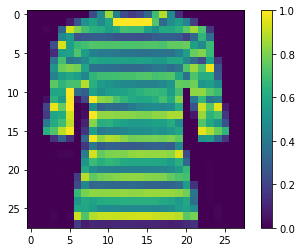

In [13]:
plt.figure()
plt.imshow(X_train[26])
plt.colorbar()

yes, it has changed to 0-1

### Build the model with TF 2.0

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [15]:
model = Sequential()
#we can pass an array in sequential model or just add another layer

model.add(Flatten(input_shape = (28,28)))
#flatten is used to change input data in 1d

model.add(Dense(128, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
#compilation of our model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'],
             
)

In [17]:
#fit the model
model.fit(X_train, y_train, epochs=2)

#epochs is used to pass parameter how many time our data is going to train
#it uses backpropogation method at every epochs to minimize the loss accuracy

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 8s 140us/sample - loss: 0.4956 - accuracy: 0.8260
Epoch 2/2
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3728 - accuracy: 0.8654


In [ ]:
#chechking test_loss, test_acc
test_loss, test_acc = model.evaluate(X_test, y_test)
test_loss, test_acc

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
y_pred = model.predict_classes(X_test)

In [23]:
accuracy_score(y_test,y_pred)

0.8794

In [24]:
pred = model.predict(X_test)

In [25]:
 pred[5]

array([1.2584045e-05, 9.9998689e-01, 8.4116776e-09, 3.0764195e-07,
       7.4045609e-08, 2.6949957e-14, 9.9868721e-08, 4.0688869e-20,
       3.0840169e-10, 8.8857627e-15], dtype=float32)

6

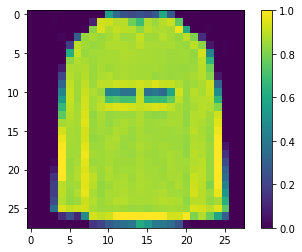

In [26]:
x=98
plt.figure()
plt.imshow(X_test[x])
plt.colorbar()
np.argmax(pred[x])